Hola Profesor Felipe

Esta data proviene de una simulación de un sistema servo que involucra un servoamplificador, un motor, un tornillo de avance / tuerca y un carro deslizante.

Primeramente procedemos a cargar las librerias necesarias:

In [1451]:
import numpy as np #util para realizar calculos avanzados
import pandas as pd # contiene funciones que nos ayudan en el calculo de datos
from matplotlib import pyplot as plt #para crear graficos de muy buena calidad
import seaborn as sns
from statistics import mean, median
import sklearn 
from sklearn.datasets import load_boston
from scipy import stats
from matplotlib import style
import matplotlib.ticker as ticker

%matplotlib inline


#se importan las librerias necesarias 

Estaremos realizando el Pre-procesado de la data

Este es el link donde se obtiene la informacion

https://archive.ics.uci.edu/ml/datasets/Servo

Cargamos el archivo

In [1452]:
dataset=pd.read_csv("servo.csv")

Visualizamos las primeras lineas:

In [1453]:
dataset.head()

,E,E.1,5,4,0.28125095
0,B,D,6,5,0.506252
1,D,D,4,3,0.356251
2,B,A,3,2,5.500033
3,D,B,6,5,0.356251
4,E,C,4,3,0.806255


Colocaremos titulo a las columnas

In [1454]:
column_names = ['Motor','Screw','pgain','vgain','time']

In [1455]:
dataset=pd.read_csv("servo.csv",names=column_names)

In [1456]:
dataset.head()

,Motor,Screw,pgain,vgain,time
0,E,E,5,4,0.281251
1,B,D,6,5,0.506252
2,D,D,4,3,0.356251
3,B,A,3,2,5.500033
4,D,B,6,5,0.356251


In [1457]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
Motor    167 non-null object
Screw    167 non-null object
pgain    167 non-null int64
vgain    167 non-null int64
time     167 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 6.6+ KB


In [1458]:
dataset.tail()

,Motor,Screw,pgain,vgain,time
162,B,C,3,2,4.499986
163,B,E,3,1,3.699967
164,C,D,4,3,0.956256
165,A,B,3,2,4.499986
166,A,A,6,5,0.806255


Verificar si hay datos null o NaN

In [1459]:
print(dataset.isna().sum())

Motor    0
Screw    0
pgain    0
vgain    0
time     0
dtype: int64


No hay datos nulos, lo cual es bueno!! 

In [1460]:
dataset.columns

Index(['Motor', 'Screw', 'pgain', 'vgain', 'time'], dtype='object')

Se grafican los datos variables

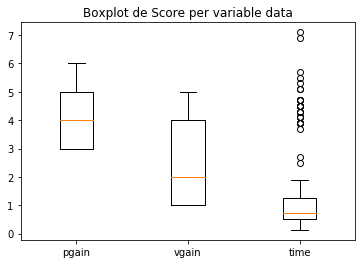

In [1461]:
df = pd.DataFrame(dataset, columns= ['pgain','vgain','time'])
df.head()

x1= df.iloc[:,0]#pgain
x2= df.iloc[:,1]#vgain
x3= df.iloc[:,2]#time

fig1, ax1 = plt.subplots()
ax1.set_title('Boxplot de Score per variable data')
ax1.boxplot([x1,x2,x3], labels=['pgain','vgain','time'])
plt.show () #evitamos que se despliegue el programa en texto.

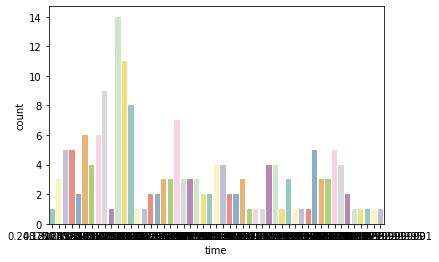

In [1462]:
plt.figure ()
sns.countplot(x="time", data=dataset, palette="Set3")
plt.show ()

Informacion adicional: "Esta es una colección interesante de 167 datos proporcionados por Karl Ulrich (MIT). Cubre un fenómeno extremadamente no lineal: predecir el tiempo de subida de un servomecanismo en términos de dos configuraciones de ganancia (continuas) y dos opciones (discretas) de enlaces mecánicos". 

(array([22., 53., 19., 21., 10.,  8.,  1.,  3.,  0.,  0.,  1.,  1.,  0.,
         0.,  0.,  1.,  5.,  6.,  5.,  4.,  0.,  2.,  1.,  2.,  0.,  0.,
         0.,  0.,  0.,  2.]),
 array([0.13124992, 0.36354518, 0.59584044, 0.8281357 , 1.06043096,
        1.29272622, 1.52502148, 1.75731674, 1.98961199, 2.22190725,
        2.45420251, 2.68649777, 2.91879303, 3.15108829, 3.38338355,
        3.61567881, 3.84797407, 4.08026933, 4.31256459, 4.54485985,
        4.77715511, 5.00945037, 5.24174563, 5.47404088, 5.70633614,
        5.9386314 , 6.17092666, 6.40322192, 6.63551718, 6.86781244,
        7.1001077 ]),
 <a list of 30 Patch objects>)

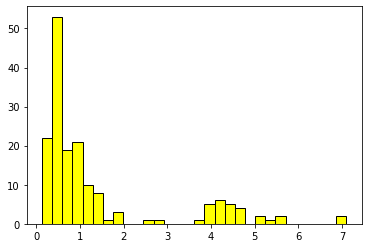

In [1463]:
plt.hist(dataset['time'], 30, color="yellow", ec="black")

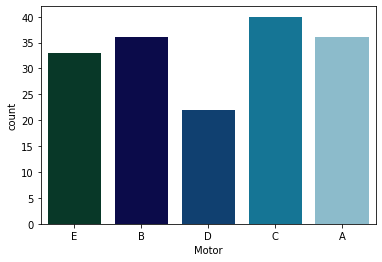

In [1464]:
sns.countplot(dataset['Motor'], palette='ocean')

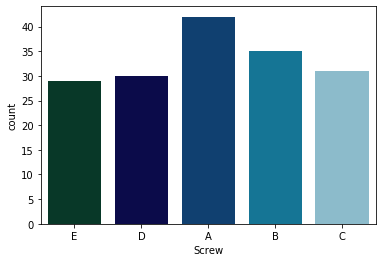

In [1465]:
sns.countplot(dataset['Screw'], palette='ocean')

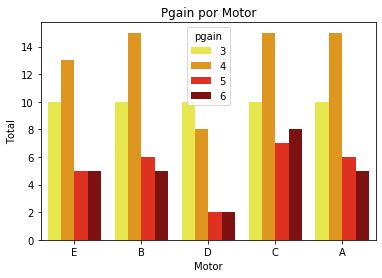

In [1466]:
grafico=sns.countplot(x='Motor', hue='pgain', palette='hot_r', data=dataset)
grafico.set(title='Pgain por Motor',xlabel='Motor', ylabel= 'Total' )
plt.show()

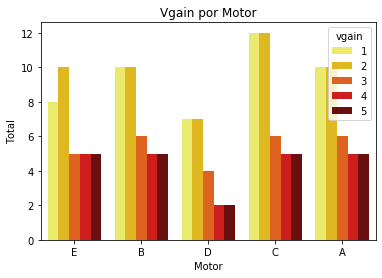

In [1467]:
grafico=sns.countplot(x='Motor', hue='vgain', palette='hot_r', data=dataset)
grafico.set(title='Vgain por Motor',xlabel='Motor', ylabel= 'Total' )
plt.show()

Cambiando la variable Categorica Motor de Objetos a valores enteros

In [1468]:
dataset['Motor']=dataset['Motor'].replace({'A':0, 'B':1, 'C':2, 'D':3, 'E':4})

In [1469]:
dataset.head()

,Motor,Screw,pgain,vgain,time
0,4,E,5,4,0.281251
1,1,D,6,5,0.506252
2,3,D,4,3,0.356251
3,1,A,3,2,5.500033
4,3,B,6,5,0.356251


Cambiando la variable Categorica Screw de Objetos a valores enteros

In [1470]:
dataset['Screw']=dataset['Screw'].replace({'A':0, 'B':1, 'C':2, 'D':3, 'E':4})

In [1471]:
dataset.head()

,Motor,Screw,pgain,vgain,time
0,4,4,5,4,0.281251
1,1,3,6,5,0.506252
2,3,3,4,3,0.356251
3,1,0,3,2,5.500033
4,3,1,6,5,0.356251


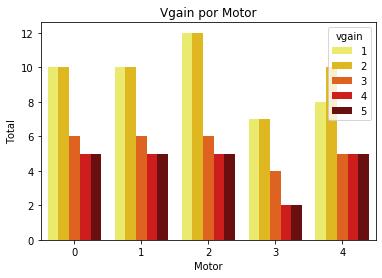

In [1472]:
grafico=sns.countplot(x='Motor', hue='vgain', palette='hot_r', data=dataset)
grafico.set(title='Vgain por Motor',xlabel='Motor', ylabel= 'Total' )
plt.show()

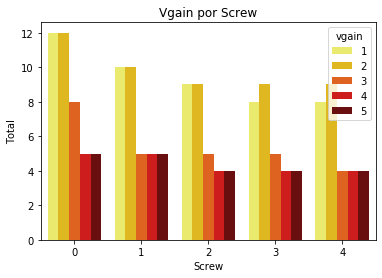

In [1473]:
grafico=sns.countplot(x='Screw', hue='vgain', palette='hot_r', data=dataset)
grafico.set(title='Vgain por Screw',xlabel='Screw', ylabel= 'Total' )
plt.show()

In [1474]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
Motor    167 non-null int64
Screw    167 non-null int64
pgain    167 non-null int64
vgain    167 non-null int64
time     167 non-null float64
dtypes: float64(1), int64(4)
memory usage: 6.6 KB


Elegimos nuestras columnas de interes

In [1475]:
cols_to_use=['Motor','Screw','pgain','vgain','time']
dataset=dataset [cols_to_use]

Verificamos la existencia de NaN

In [1476]:
dataset.isnull().values.any()

False

El resultado nos muestra que no tenemos NaN

In [1477]:
dataset.shape

(167, 5)

Seleccionamos un conjunto de features basicos y la etiqueta. En este caso con el motor, el tornillo de avance/tuerca y el vgain determinar el pgain.

In [1478]:
features=dataset[['Motor','Screw','vgain']]

In [1479]:
labels=dataset['pgain']

Validamos los cambios realizados

In [1480]:
dataset.head()

,Motor,Screw,pgain,vgain,time
0,4,4,5,4,0.281251
1,1,3,6,5,0.506252
2,3,3,4,3,0.356251
3,1,0,3,2,5.500033
4,3,1,6,5,0.356251


In [1481]:
features.head()

,Motor,Screw,vgain
0,4,4,4
1,1,3,5
2,3,3,3
3,1,0,2
4,3,1,5


In [1482]:
features.tail()

,Motor,Screw,vgain
162,1,2,2
163,1,4,1
164,2,3,3
165,0,1,2
166,0,0,5


En este momento vamos a proceder a partir el conjunto de datos en training 80% y testing 20%

In [1483]:
from sklearn.model_selection import train_test_split

In [1484]:
X_train, X_test, y_train, y_test = train_test_split(features,labels, random_state=13)

verificamos los tamaños de los subgrupos de Train & Test

In [1485]:
X_train.shape

(125, 3)

In [1486]:
X_test.shape

(42, 3)

In [1487]:
y_train.shape

(125,)

In [1488]:
y_test.shape

(42,)

La Investigacion nos indica que debemos usar 3 métodos de los vistos en clase, vamos a empezar con el primero DT

# DecisionTreeClassifier

In [1489]:
from sklearn.tree import DecisionTreeClassifier

Estamos definiendo una produndidad de 3

In [1490]:
DecisionTreeModel = DecisionTreeClassifier(max_depth = 3)

In [1491]:
DecisionTreeModel.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Importaremos la metrica "accuracy"

In [1492]:
from sklearn.metrics import accuracy_score

Llevamos a cabo la prediccion con valores de "testing"

In [1493]:
y_predict = DecisionTreeModel.predict(X_test)

In [1494]:
dt1 = accuracy_score(y_test, y_predict)
dt1

0.5714285714285714

Llevamos a cabo la prediccion con valores de "Training" esto porque Testing dio muy bajo para saber el valor de training

In [1495]:
y_predict = DecisionTreeModel.predict(X_train)

In [1496]:
dt2 = accuracy_score(y_train, y_predict)
dt2

0.752

El valor del Testing y prediccion estan bajos por lo que estamos en un estado underfitting

Dado a los valores de Training y Testing tan bajos vamos agregar el feature del tiempo para obtener los valores del testing y determinar si el modelo mejora el resultado.

In [1497]:
features=dataset[['Motor','Screw', 'vgain', 'time']]

In [1498]:
labels=dataset['pgain']

In [1499]:
from sklearn.model_selection import train_test_split

In [1500]:
X_train, X_test, y_train, y_test = train_test_split(features,labels, random_state=13)

In [1501]:
X_train.shape

(125, 4)

In [1502]:
from sklearn.tree import DecisionTreeClassifier

In [1503]:
DecisionTreeModel = DecisionTreeClassifier(max_depth = 3)

In [1504]:
DecisionTreeModel.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [1505]:
from sklearn.metrics import accuracy_score

In [1506]:
y_predict = DecisionTreeModel.predict(X_test)

In [1507]:
dt1 = accuracy_score(y_test, y_predict)
dt1

0.9047619047619048

In [1508]:
y_predict = DecisionTreeModel.predict(X_train)

In [1509]:
dt2 = accuracy_score(y_train, y_predict)
dt2

0.912

Se obtiene una mejora significativa en el modelo de DecisionTree, siendo el valor predictivo similar al de training y superior a 90% por lo que podemos indicar que el modelo esta balanceado. 

# kNN con scikit-learn

In [1510]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

In [1511]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [1512]:
training_accuracy = []
test_accuracy = []

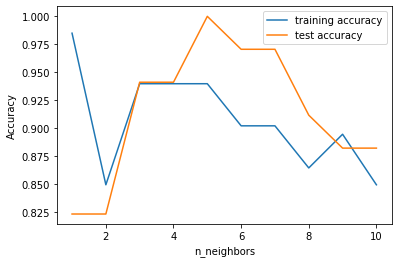

In [1513]:
import matplotlib.pyplot as plt
%matplotlib inline

neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # se construye el modelo de clasificacion
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # se almacena el "training set accuracy"
    training_accuracy.append(clf.score(X_train, y_train))
    # se almacena la "generalization accuracy"
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

El grafico de arriba nos muestra que en un valor de 3 es cuando obtenemos un mejor accuracy

Por lo que vamos a realizar una prueba con diferente valor de n_neighboards para comprobar cuanto varia el resultado del balanceo utilizando un numero diferente a 3

In [1514]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=0,train_size=0.8)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
n_neighbors = 3
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.97
Accuracy of K-NN classifier on test set: 0.88


Con un n de 3 obtenemos un valor de training similar al de test con muy buenos resultados. 

In [1515]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=0,train_size=0.8)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
n_neighbors = 6
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.86
Accuracy of K-NN classifier on test set: 0.76


Con un n de 6 obtenemos un valor de training y test inferior al con un n 3 por lo que estamos underfitting. 

# Logistic Regression

In [1516]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [1517]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.5, random_state=4)
logreg = LogisticRegression(solver='liblinear').fit(X_train, y_train)
print("Training set score: {:.4f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.4f}".format(logreg.score(X_test, y_test)))

Training set score: 0.8193
Test set score: 0.8333


C:\Users\avilagj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


C:\Users\avilagj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\avilagj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\avilagj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\avilagj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_clas

C:\Users\avilagj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\avilagj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\avilagj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\avilagj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_clas

C:\Users\avilagj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\avilagj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\avilagj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\avilagj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_clas

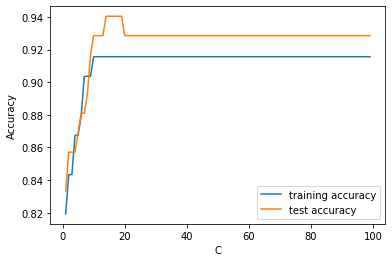

In [1518]:
import matplotlib.pyplot as plt
%matplotlib inline
training_acc = []
test_acc = []
rango = range(1, 100)
for c in rango:
    clf = LogisticRegression(C=c, solver='liblinear')
    clf.fit(X_train, y_train)
    training_acc.append(clf.score(X_train, y_train))
    test_acc.append(clf.score(X_test, y_test))
plt.plot(rango, training_acc, label="training accuracy")
plt.plot(rango, test_acc, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.legend()

La grafica muestra buenos resultados de Testing y Training, por lo que el modelo esta balanceado.

# Análisis discriminante lineal 

In [1519]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [1520]:
dataset.columns

Index(['Motor', 'Screw', 'pgain', 'vgain', 'time'], dtype='object')

In [1521]:
df = pd.DataFrame(dataset, columns= ['Motor', 'Screw', 'pgain', 'vgain', 'time'])
df.head()

,Motor,Screw,pgain,vgain,time
0,4,4,5,4,0.281251
1,1,3,6,5,0.506252
2,3,3,4,3,0.356251
3,1,0,3,2,5.500033
4,3,1,6,5,0.356251


In [1522]:
len(df.index)

167

A continuación, ajustaremos el modelo LDA a nuestros datos utilizando la función LinearDiscriminantAnalsyis de sklearn: 

In [1523]:
#define predictor and response variables
X = df[['Motor','Screw', 'vgain', 'time']]
y = df['pgain']

#Fit the LDA model
model = LinearDiscriminantAnalysis()
model.fit(X, y)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

Una vez que hemos ajustado el modelo con nuestros datos, podemos evaluar qué tan bien se desempeñó el modelo mediante el uso de validación cruzada estratificada repetida de k veces. 

usaremos 3 pliegues y 3 repeticiones: 

In [1524]:
#Define method to evaluate model
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)

In [1525]:
#evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))   

0.8678718400940624


Podemos ver que el modelo obtuvo una precisión media del 86,78%. 